In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lasso回帰
Redge回帰と同様に線形回帰の正則化を行う手法.Lasso回帰ではコスト関数に正則化項として重みベクトルのl1ノルムを使う.

$$J(\theta) = MSE(\theta)+\alpha \sum_{i=1}^{n}|\theta_i|$$
Lasso回帰はパラメータ$\alpha$を大きくすると,重要性の低い特徴量の重みを完全に取り除いてしまう性質がある.

In [2]:
df = pd.read_csv("data3.csv")
df.head()

,x,y
0,4.337520,7.763191
1,0.201284,7.851685
2,-0.504076,7.773407
3,0.812612,9.694481
4,4.670285,7.922672


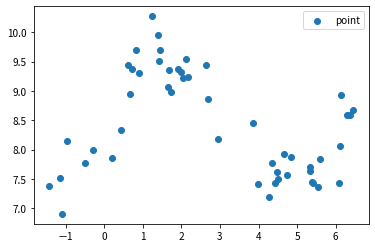

In [3]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

## scikit-learnによるLasso回帰

In [4]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_poly,y)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3969895638884395, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [21]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.720786758836816
傾き :  [ 0.64208423 -0.16620376 -0.04314636  0.00827344]
決定係数 :  0.7587326730918746


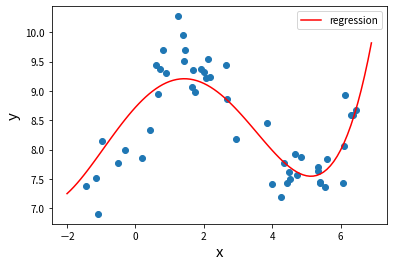

In [22]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

## ハイパーパラメータの効果

alpha :  0
切片 :  8.750385452096701
傾き :  [ 0.93441723 -0.33079316 -0.01674545  0.00707951]
決定係数 :  0.7962557418081162

alpha :  0.001
切片 :  8.74979108485643
傾き :  [ 0.93150135 -0.3288952  -0.01709938  0.00709959]
決定係数 :  0.7964508433943909

alpha :  0.01
切片 :  8.7450301224439
傾き :  [ 0.90524371 -0.31231061 -0.02010743  0.00726427]
決定係数 :  0.797624675394495

alpha :  0.1
切片 :  8.720786758836816
傾き :  [ 0.64208423 -0.16620376 -0.04314636  0.00827344]
決定係数 :  0.7587326730918746

alpha :  1
切片 :  8.855642851212858
傾き :  [ 0.         -0.         -0.02844317  0.00407046]
決定係数 :  0.31005181264220827



<ipython-input-23-780c57b15aa7>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_poly,y)
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9098499221141587, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9101085719469837, tolerance: 

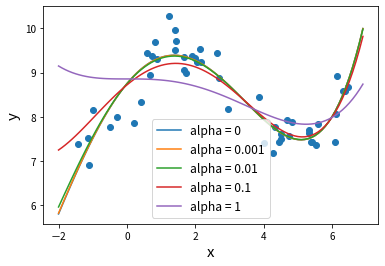

In [23]:
degree = 4
alphalist = [0,0.001,0.01,0.1,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = Lasso(alpha=alpha) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.show()